## <span style=color:darkblue> Assignment: Naives Bayes and Logistic Classifiers </span>

- Ashlea Pin Jui Huang - 989357938

In [3]:
library(pracma)
install.packages("pryr")
library(pryr)
install.packages("Deriv")
library(Deriv)
install.packages("zoocat")
library(zoocat)


The downloaded binary packages are in
	/var/folders/0f/c21z6n2d4xz2mktks7q9y0zh0000gn/T//RtmpBwcipX/downloaded_packages


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp


Attaching package: ‘pryr’


The following object is masked from ‘package:pracma’:

    bits





The downloaded binary packages are in
	/var/folders/0f/c21z6n2d4xz2mktks7q9y0zh0000gn/T//RtmpBwcipX/downloaded_packages

The downloaded binary packages are in
	/var/folders/0f/c21z6n2d4xz2mktks7q9y0zh0000gn/T//RtmpBwcipX/downloaded_packages


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: reshape2


Attaching package: ‘zoocat’


The following object is masked from ‘package:stats’:

    cor




### Problem 1
Given the function $f(x)=x^2+6x$
#### Part 1
Use derivative of f(x) to find the value of x that minimizes this function.

In [4]:
f = function(x) x^2+6*x
d = Deriv(f)
d

function (x) 
2 * x + 6

For this problem, we will use deriv function to find the value of x.

As you can see $\frac{d}{dx}=2x+6$, the solution will be shown below:

Set $\frac{d}{dx}=0$

Which means $2x+6=0,  x=-3$

Therefore $x=-3$ will minimize the function.

#### Part 2
Use gradient descent to find the value of x that minimizes this function. Compare your answer with the previous part.

In [5]:
grad = function(x)2*x+6
x = 0.1 # initialize the first guess for x
alpha = 0.6 # define the learning rate
j = 100 #iterations
for (step in 1:j) {
x = x - alpha*grad(x) # finding the value of x
}
print(x)

[1] -3


As seen above, gradient descent covergence is $x=-3$, which matches the answer in the previous question.

### Problem 2

The Space Shuttle Challenger disaster occurred on January 28, 1986, when it broke apart 73 seconds into its flight, leading to the deaths of its seven crew members. The spacecraft disintegrated over the Atlantic Ocean, off the coast of central Florida at 11:38 EST. Disintegration of the entire vehicle began after an O-ring seal in its right solid rocket booster failed at liftoff. Subsequently, a special commission was appointed to investigate the accident. The commission found that NASA disregarded warnings from engineers about the dangers of launching posed by the low temperatures of that morning, claiming that en- gineers could not provide a convincing argument against the launch (source: Wikipedia, Applied Probability for Engineers).
File Oring.csv provides data on launch temperature and O-ring failure for the 24-space shuttle launches prior to the Challenger disaster. There are six O-rings used to seal field joints on the rocket motor assembly. A +1 in the O-rings indicates that at least one O-ring failure had occurred on that launch and a 0 indicates that no failure had occurred.

In [6]:
oring = read.csv('/Users/AshleaHuang/Desktop/ORing.csv')

In [7]:
head(oring)

Temp,Failure
<int>,<int>
53,1
56,1
57,1
63,0
66,0
67,0


#### Part 1
Normalize the launch temperature using the expression $\frac{x−μ}{σ}$

In [8]:
#normalize temp
temp_nor = normalize(oring$Temp, method = 'sd1')
#new data
oring_nor = data.frame(Temp = temp_nor, Failure = oring$Failure)

In [9]:
oring_nor

Temp,Failure
<dbl>,<int>
-2.2930074,1
-1.8863657,1
-1.7508184,1
-0.9375350,0
-0.5308933,0
-0.3953461,0
-0.3953461,0
-0.3953461,0
-0.2597989,0


#### Part 2
Create a logistic regression model using the gradient decent technique to predict the probability of O-ring failure based on the launch temperature. Provide the equation for your model.

In [10]:
x = cbind(rep(1, length(oring_nor$Temp)), oring_nor$Temp)

#assign 2 numbers from a normal distribution with mean 0 for weights
w1 = rnorm(2,0,0.1)
#learning rate
alpha = 0.01
#iterations
j=500 

#update the weights
for (i in 1:j){
  new_w = w1 - alpha * rowSums(sapply(1:length(x[,1]), function(i) as.vector((1/(1 + exp(-(w1 %*% x[i,]))) - oring_nor$Failure[i])) * x[i,]))
  w1 = new_w
                                   }
print(w1)

[1] -1.102804 -1.263910


In [17]:
x

1,-2.2930074
1,-1.8863657
1,-1.7508184
1,-0.9375350
1,-0.5308933
1,-0.3953461
1,-0.3953461
1,-0.3953461
1,-0.2597989
1,-0.1242516
1,0.0112956


#### Part 3
Provide a plot of the original data along with your logistic model.

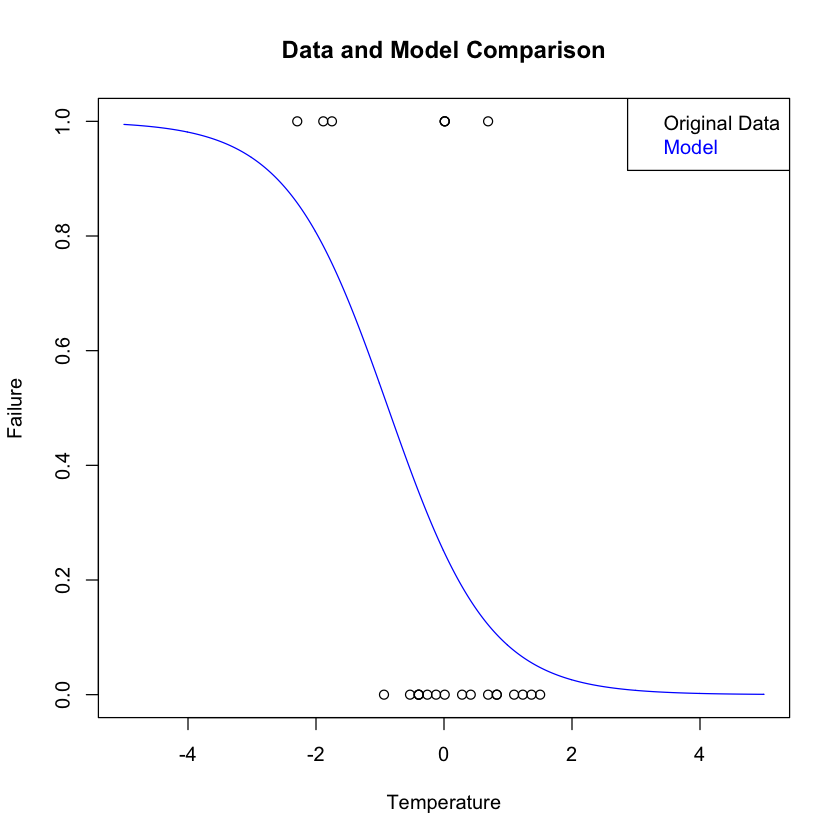

In [23]:
plot(oring_nor, xlim=c(-5,5),  main = 'Data and Model Comparison', xlab = 'Temperature', ylab = 'Failure')
s = function(x) 1 / (1 + exp(-x))
plot = cbind(rep(1, length(seq(-5,5,0.01))), seq(-5,5,0.01))
lines(seq(-5,5, 0.01), apply(plot, 1, function(x) s((w1 %*% x))), col = 'blue')
legend("topright", legend = c('Original Data', 'Model'), text.col = c('black','blue'))

#### Part 4
The actual temperature at the Challenger launch was 31 degrees Fahren- heit. According to your model what was the probability of O-ring failure on the Challenger launch? Could the engineers have used your model to provide a convincing argument to NASA? Elaborate.

In [12]:
norm = (31 - mean(oring$Temp)) / sd(oring$Temp)

In [241]:
p = 1/(1+exp(-(w1 %*% c(1,norm))))
print(p)

          [,1]
[1,] 0.9961827


$p̂ (31)=0.9961827$

As you can see, base on the model created, the probability of the o-ring failure is around 99.6% with a launch temperature of 31 degrees Fahrenheit. Due to the contradiction, I would say this is unlikely to be a convincing argument to NASA since it isn't accruate.